# TITANIC DATASET ANAYSIS AND EMAIL SPAM DETECTION

**The first dataset:**

*The titanic was a trans-atlantic passenger ship that set sail for new york in 1912 but struck an iceberg on her way and sunk killing over 1500 passengers on board.*

*In this notebook I will attempt to predict the likelohood that a passenger survived or perished based on a set of passenger features that we have been provided with*

**The second dataset:**

*The "spam" concept is diverse and can be applied in advertisements for products/web sites, make money fast schemes, chain letters.*

**1.1.1 Defining the Questions**

*Predict if a passenger survived the sinking of the Titanic or not.*
*Predict whether an email is spam or not spam.*

**1.1.2 Metrics for success**

*Since both projects are classification problems, we will use:*
*Accuracy; threshold 85%*
*For target class imbalance we will use*
*(harmonic mean between the positive rate (precision) and the negative rate (Recall))*
F1 score; threhold 85%

**1.1.3 The Context**

*This is a challenge on Kaggle.com “Titanic: Machine Learning from Disaster” Competition.*



**1.1.4 Experimental Design taken**

*Project 1: Predicting survival in the titanic Disaster*

*Loading the dataset*

*Exploratory Data Analysis*

*Visualization*

*Data Cleaning*

*Features Engineering*

*Modeling: K-Nearest Neighbors Classifier (KNN)*

*Hyperparameter Tuning*

*Optimization techinques for KNN*

*Recommendations*

*Challenging the model: Random Forest Classifier*

*Conclusion*


**Project 2: Predicting whether an email is a spam or ham**

*Loading the dataset*

*Exploratory Data Analysis*

*Visualization*

*Modelling: Naive Bayes Classifier: GaussianNB*

*Optimizing techniques for Gaussian Naive Bayes Classifier*

*Recommendations*

*Challenging the solution: Support Vector Classifier*

*Conclusion*

## TITANIC DATASET

**The dataset contains the following fields:**

*Pclass Ticket class (: 1=upper, 2=middle, 3=lower)*

*Sex : Gender*

*Age : Age in years (fractional for babies)*

*Sibsp : Number of siblings and spouse. Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses *and fiancés were ignored)*

*Parch: Number of parents or children aboard the ship. Parent = mother, father. Child = daughter, son, stepdaughter, stepson.* 
*Some children travelled only with a nanny, therefore parch=0 for them.*

*Ticket: Ticket number (a string of characters)*

*Fare: Passenger fare (dollars)*

*Cabin: Cabin number (a string of characters)*

*Embarked: Port of embarkation (S=Southampton, Q=Queenstown (now Cobh), C=Cherbourg)*


## data cleaning and exploration

*importing the relevant libraries*

In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

*for the titanic dataset we were provided with 2 datasets,A train and test dataset with the test dataset lacking the dependent variable*

In [214]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

*reading the data from both the train and test datasets*

In [215]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


*viewing measures of central tendency using the describe method*

In [217]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [218]:
test.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


*the test dataset contains 418 rows while the train dataset contain more than twice that at 891*

In [219]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [220]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*both the train and test datasets contain null located in 2 columns primarily the 'age' and 'cabin' columns*

*we will drop the cabin column as it contains far too many nulls for imputation to be succesful but will coduct imputation on the 'age' column using the class means*

**NB**

*calculating the class mean will be separating the different classes and calculating the age column means of those classes*

*we will use the train dataset's unique class age means to conduct the imputation*

In [221]:
class1 = train[train['Pclass'] == 1 ] 
class2 = train[train['Pclass'] == 2 ] 
class3 = train[train['Pclass'] == 3 ] 

class1_mean = class1['Age'].mean()
class2_mean = class2['Age'].mean()
class3_mean = class3['Age'].mean()

*we will write a function that checks the passenger class and whether a null value exists in which case we will impute using the correct mean value*

In [222]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return class1_mean
        elif Pclass == 2:
            return class2_mean
        else:
            return class3_mean
    else:
        return Age

*Now to use the apply method to impute the mean values to boh the train and test datasets*

In [223]:
train['Age'] = train[['Age','Pclass']].apply(age_approx,axis=1)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [224]:
test['Age'] = test[['Age','Pclass']].apply(age_approx,axis = 1)

In [225]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*above you can see that our imputation worked since there are zero nulls in either the test or train datasets age columns*

*we will now drop the cabin column and run the dropna method to drop the remaining nulls that have been detected*

In [226]:
train2 = train.drop(['Cabin'],axis = 1)
test2 = test.drop(['Cabin'],axis = 1)

In [227]:
train.dropna(inplace = True)
test2.dropna(inplace = True)

In [228]:
test2.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

*after dropping the cabin column and any other reamining values we will move on to EDA and explore the dataset*

## EDA

## Univariate And Bivariate Analysis

*we will create a histogram of survivors and non survivors categorized by age and grouped by gender*

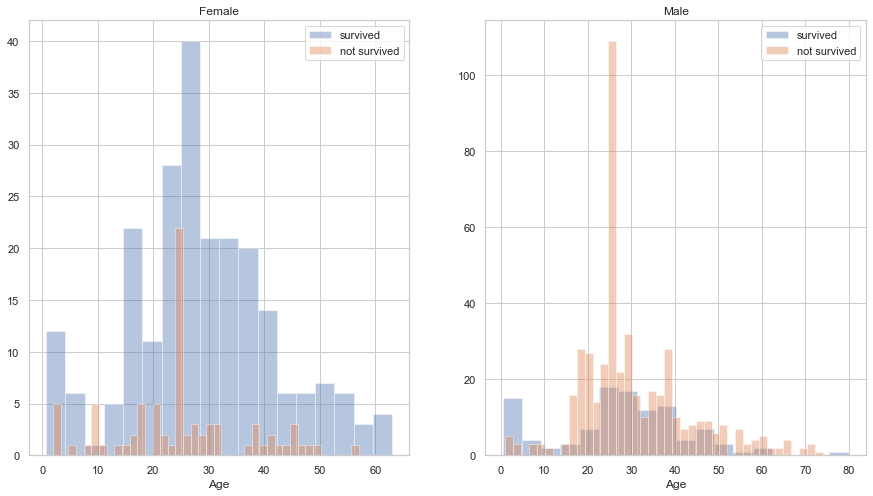

In [229]:
# Plot using seaborn
sns.set(style = 'whitegrid', context = 'notebook')
# First we create variables labeling the survived column values 0 and 1
survived = 'survived'
not_survived = 'not survived'


# creating a chart where our plots will appear
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 8))

# creating women and male variables from the male and female variables in the dataset
women = train2[train2['Sex']=='female']
men = train2[train2['Sex']=='male']

# Plotting the histogram of the women and specifying the bin sizes, and labels as we created earlier

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Plotting the histogram of the men and specifying the bin sizes, and labels as we created earlier
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
plt.show()

*Above it seems men had a higher probability of dying than women which goes to reinforce the policy the titanic had of women and children first when it came to boarding the lifeboats*

*there seems to be a spike in both genders between the ages of 20 and 30 where a disproportionate number of people in their mid-twenties seemed to have died*

*It is especially evident in the male histogram and slightly noticeable in the female histogram*

*you might also notice that the not survived histogram in the male plot has a somewhat normral distribution whilst that of the survived in the female plot follows the normal distribution curve*

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


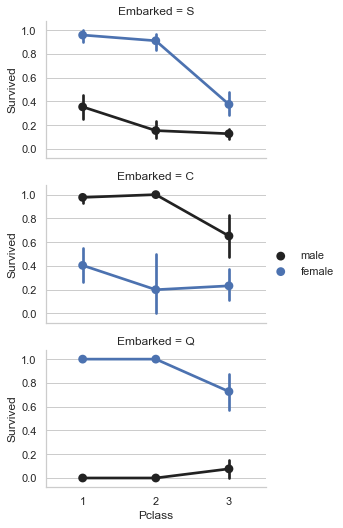

In [230]:
sns.set(style = 'whitegrid', context = 'notebook')
FacetGrid = sns.FacetGrid(train2, row = 'Embarked', size = 2.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
             palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

*above we use a facet grid to see if there is any correlation between port of departure and probability of survival grouped by  gender and class*


*It appears that females who embarked from all ports had a lower chance of survival as their class level decreased whilst the 
survivability of males tended to increase or stabilize as their class level decreased*

**NB**

*Class is an inverse value with class 3 denoting third class which is the lowest class one could have*

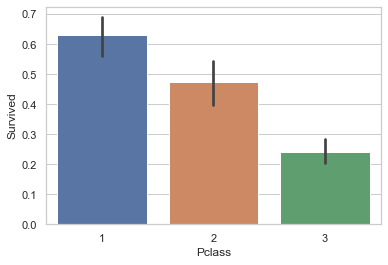

In [231]:
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=train2)

*above it is quite evident that passengers from first class were the most likely to survive,we will include class in trying to predict survivability as it is important*

*the sibsp and parch columns will be summed up to make one column named relatives*

*we will then use this column to create an extra column called not_alone which contains information on whether a passenger was alone or not and denote with 1 meaning not alone and 0 meaning alone*

In [232]:
data = [train2, test2]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch'] # new column that has total relatives on board
    # new column with two classes whether you are alone or not
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1 
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset ['not_alone'].astype(int) 
  
  
train2['not_alone'].value_counts()

0    537
1    354
Name: not_alone, dtype: int64

*counting the number of passengers who were not alone we can see tha *

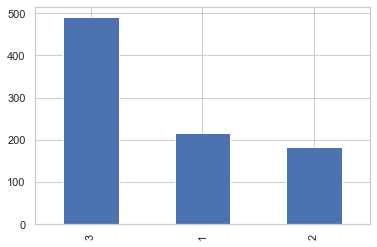

In [233]:
train2['Pclass'].value_counts().plot.bar()

In [234]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


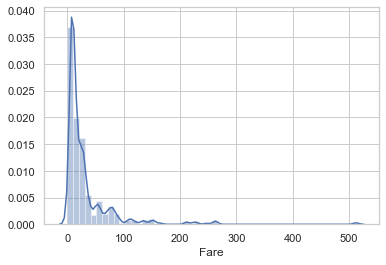

In [235]:
sns.distplot(train2['Fare'])

*most fares are below 100 pounds which would coincide with the frequency graph above of most passengers being from the 3rd class who paid the lowest fares amongst all the classes*

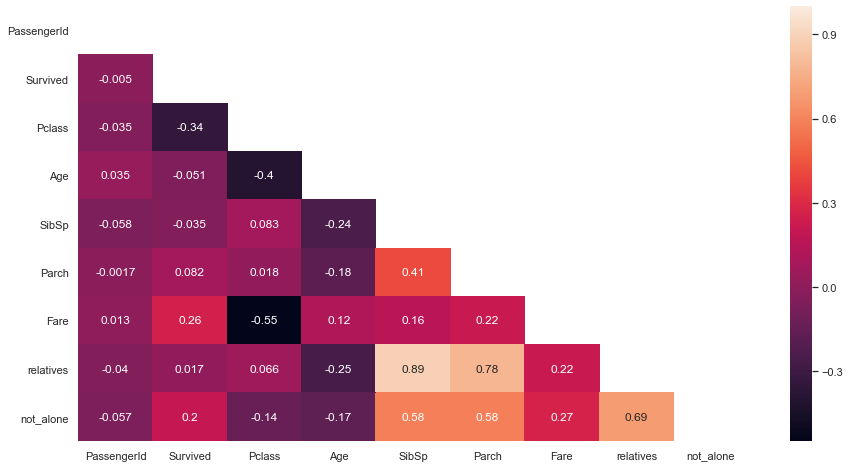

In [236]:
plt.figure(figsize=(15,8))
heatmap = np.zeros_like(train2.corr(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(train2.corr(),annot=True,mask=heatmap)

*the positively highly correlated features(>0.7) are between the 'sibsp' and 'parch' columns and the new 'relatives' column that was created from combining those 2 columns*

*we will drop these columns including the 'relatives' column and only use the 'not_alone' column as it contains all the information that we require about a person having relatives on board*

In [237]:
train3 = train2.drop(['SibSp','Parch','relatives','PassengerId','Name','Ticket'],axis=1)

In [238]:
test3 = test2.drop(['SibSp','Parch','relatives','PassengerId','Name','Ticket'],axis=1)

*creating a new dataset that we will called train3 with the dropped correlated features as well as ohter irrelevant features such as the name,passenger and ticket number*

c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\wwamb\appdata\local\programs\python\python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 720x1080 with 0 Axes>

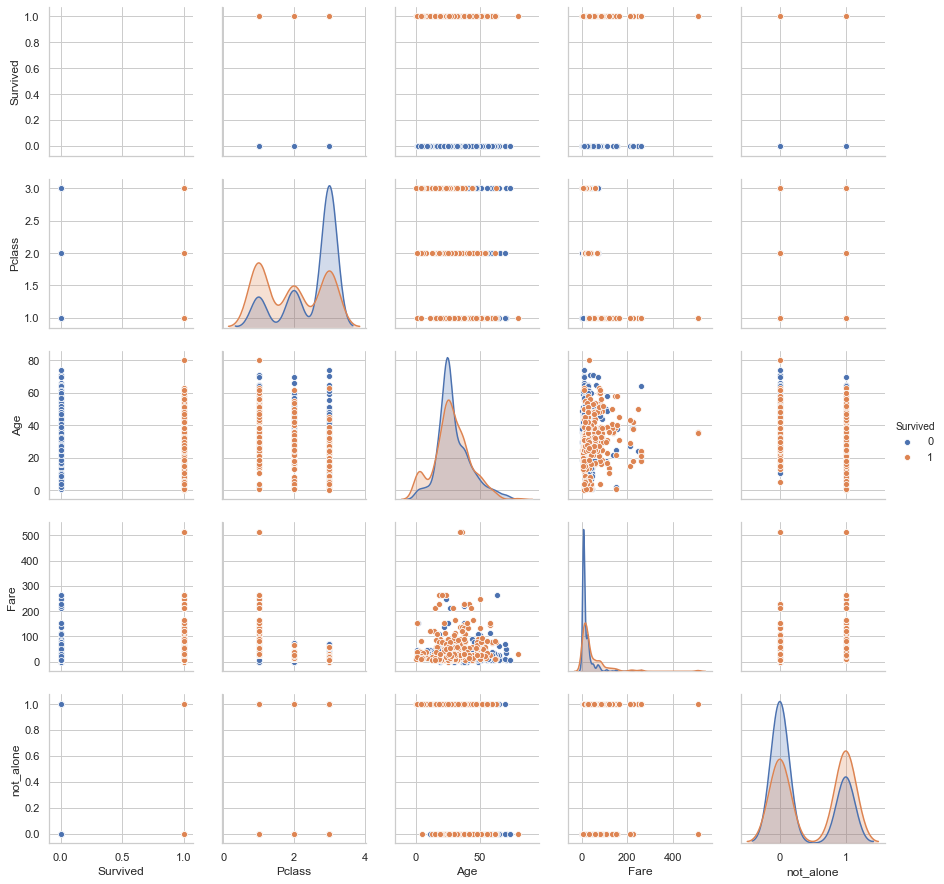

In [239]:
plt.figure(figsize=(10,15))
sns.pairplot(train3, kind="scatter", diag_kind="kde", hue="Survived")
plt.show()

*the scatterplots show the different relationships between the features denoted by whether a person survived or not*


In [240]:
train3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


*we will now conduct further feature engineering by label encoding the sex and embarked column and creating different numbered bin sizes for the age and fare columns as well changing the datatypes*

In [241]:
gender = {"male":0, "female":1}

data = [train3, test3]
#writing a for loop to loop through the train and test datasets 

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

*above we have label encoded the sex column with 1 for female and 0 for male*

*below we use a for loop to loop through both the train and test sets and create 7 different bins for the age columns representing different age groups*

In [242]:
data = [train3, test3]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6

*we will do the same for the fare column and create 5 different bin sizes with increasing fare spend as the bin number gets larger.We will also change the datatype of the column to int to reflect the increasing values of the bins*

In [243]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [244]:
embark = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)
    dataset['Embarked'] = dataset['Embarked'].astype('category')

*above we label encoded the ports for embarking and changed the datatype to categorical*

In [245]:
train3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,not_alone
0,0,3,0,2,0,0.0,1
1,1,1,1,5,3,1.0,1
2,1,3,1,3,1,0.0,0
3,1,1,1,5,3,0.0,1
4,0,3,0,5,1,0.0,0


In [246]:
test3.head()

,Pclass,Sex,Age,Fare,Embarked,not_alone
0,3,0,5,0,2,0
1,3,1,6,0,0,1
2,2,0,6,1,2,0
3,3,0,3,1,0,0
4,3,1,2,1,0,1


*above you can see that our label encoding was successful and now we have standardized values to train our model*

*next we will convert the sex and survived features to categorical dataypes*

In [247]:
for dataset in data:
    dataset[['Sex']] = dataset[['Sex']].astype('category')

In [248]:
train3['Survived'] = train3['Survived'].astype('category')

In [249]:
train3.dtypes

Survived     category
Pclass          int64
Sex          category
Age             int32
Fare            int32
Embarked     category
not_alone       int32
dtype: object

In [250]:
test3.dtypes

Pclass          int64
Sex          category
Age             int32
Fare            int32
Embarked     category
not_alone       int32
dtype: object

In [251]:
train3.dropna(inplace = True)

## K Nearest Neighbour Classifier


*It is a supervised Machine learning algorithm*

*It's non-parametric as it uses a flexible number of parameters.*

*It makes few assumptions about the data.*

*Also, an instance based algorithm;*
*i.e. knn looks at the nearest neighbours to decide what any queried point should be.*

*It stores all the available cases and classifies new cases by a majority vote of its K neighbours*

*first we will split the data into the independent and depedent variables*

In [252]:
modeltrain = train3.iloc[:,1:]
modeltest = train3['Survived']
modeltrain

,Pclass,Sex,Age,Fare,Embarked,not_alone
0,3,0,2,0,0.0,1
1,1,1,5,3,1.0,1
2,3,1,3,1,0.0,0
3,1,1,5,3,0.0,1
4,3,0,5,1,0.0,0
...,...,...,...,...,...,...
886,2,0,3,1,0.0,0
887,1,1,2,2,0.0,0
888,3,1,3,2,0.0,1
889,1,0,3,2,1.0,0


*we will also convert the test dataset to a matrix and use it to test the algorithm*

**we will create a function where we will pass 4 arguments which are**

   * the type of classification algorithm to be used
   * the train and test datasets
   * the testsize to be used 
   
*the fuction will the proceed to split the data into train and test sets,fit the data and return the accuracy scores*   

In [253]:
def model(classifier, X, y,testsize):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=33)
    classify = classifier.fit(X_train, y_train)
    pred = classify.predict(X_test)
    result = print(classification_report(pred,y_test))
    result2 = print(confusion_matrix(pred,y_test))
    return result
    return result2

In [254]:
Kclass = KNeighborsClassifier(n_neighbors=1)

In [255]:
model(Kclass,modeltrain,modeltest,0.3)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       176
           1       0.72      0.73      0.72        91

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267

[[150  26]
 [ 25  66]]


*Our accuracy rate with a test set of 0.3 is at 81% which is still below our target accuracy level*



In [256]:
model(Kclass,modeltrain,modeltest,0.4)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       233
           1       0.67      0.70      0.69       123

    accuracy                           0.78       356
   macro avg       0.75      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356

[[191  42]
 [ 37  86]]


*our accuracy with a test size of 0.4 reduced to 78%*

*let us try with a testsize of 0.2 since it seems that increasing the testsize decreases the accuracy*

In [257]:
model(Kclass,modeltrain,modeltest,0.2)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       113
           1       0.66      0.68      0.67        65

    accuracy                           0.75       178
   macro avg       0.73      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178

[[90 23]
 [21 44]]


*it appears that decreasing the test size gave us the lowest accuracy at 75%*

*this means that our algorithm has a sweet spot of a test size of 0.3*

### HYPERPARAMETER TUNING

*we will now tune our model using LDA which will reduce the number of features and should in theory bring an improvment in performance*

In [258]:
X_train,X_test,y_train,y_test = train_test_split(modeltrain,modeltest,test_size=0.3,random_state=0)

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)

In [260]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)

X_train2 = lda.fit_transform(X_train2, y_train)
X_test2 = lda.transform(X_test2)


In [261]:
Kclass2 = KNeighborsClassifier(n_neighbors=3)

In [262]:
nearest = Kclass.fit(X_train2,y_train)
pred2 = nearest.predict(X_test2)

In [263]:
print(classification_report(pred2,y_test))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       161
           1       0.59      0.61      0.60       106

    accuracy                           0.68       267
   macro avg       0.66      0.67      0.67       267
weighted avg       0.68      0.68      0.68       267



## challenging the solution

*we will be using a random forest classifier to challenge our model and see if it yields a higher accuracy*

In [264]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1)

In [265]:
model(random_forest,modeltrain,modeltest,0.4)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       250
           1       0.66      0.79      0.72       106

    accuracy                           0.81       356
   macro avg       0.78      0.81      0.79       356
weighted avg       0.83      0.81      0.82       356

[[206  44]
 [ 22  84]]


*using the random forest classifier to test we see that the accuracy is less than our most accurate knn model*

*this means that our original model was effective at predicting the outcome*

**Conclusion**

*it appears that our baseline model is the most accurate of all the models we've run including the optimized dataset*

# Spam classification dataset

*The "spam" concept is diverse and can be applied in advertisements for products/web sites, make money fast schemes, chain letters.*

*below we will try to predict whether an email is spam or not based on the number of features that we have been provided with*

**loading the dataset**

In [266]:
df = pd.read_csv('spambase.csv')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**we will first rename the columns to their respective column names**

In [267]:
df.columns = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',
'word_freq_over',
'word_freq_remove',
'word_freq_internet',
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_(',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total',
'spam'
]

In [268]:
df.shape

(4600, 58)

In [269]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [270]:
df.duplicated().sum()

391

In [271]:
df= df.drop_duplicates(keep = 'first')

*we have duplicated rows in our dataset that we dropped that reduced the size of our dataset by about 400 rows*

In [272]:
df.shape

(4209, 58)

## EDA

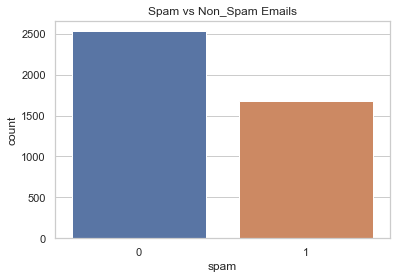

In [273]:
sns.countplot(df.spam)
plt.title('Spam vs Non_Spam Emails')
plt.show()

*the countplot above displays the number of spam and non spam emails with 0 being non spam and 1 being spam*

*you can tell that majority of the dataset is composed of non spam emails*

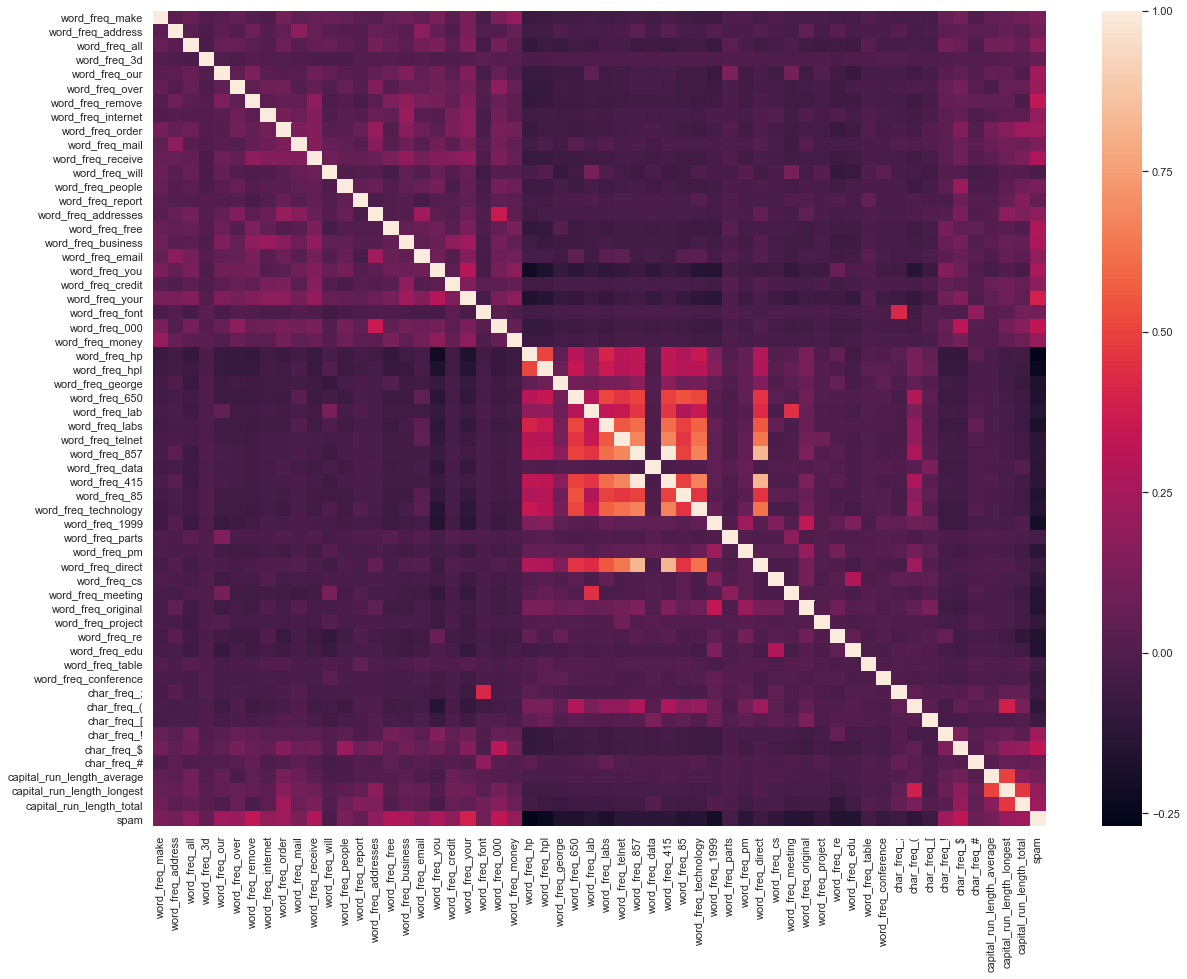

In [274]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())

## Naive Bayes Model

*splitting the independent and dependent variables*

In [275]:
X = df.drop(['spam'],axis=1).values
Y = df['spam'].values
X

array([[2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
        1.028e+03],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
        2.259e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 3.537e+00, 4.000e+01,
        1.910e+02],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 1.404e+00, 6.000e+00,
        1.180e+02],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 1.147e+00, 5.000e+00,
        7.800e+01],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 1.250e+00, 5.000e+00,
        4.000e+01]])

*we will be using the Gaussian naive bayes classifier*

*but first we will normalize the data as a Gaussian classifier only works with normally distributed data*

*we will call the gaussian classificition method using the variable gauss*

In [276]:
gauss = GaussianNB()

*creating training and testing data*

In [277]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

*we will use the sklearn normalizer method to normalize the data and then fit the data to run predictions*

In [278]:
norm = Normalizer()

X = norm.fit_transform(X)

In [279]:
model2 = gauss.fit(xtrain,ytrain)

In [280]:
pred = model2.predict(xtest)

In [281]:
print(classification_report(pred,ytest))
print(confusion_matrix(pred,ytest))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       379
           1       0.96      0.74      0.84       463

    accuracy                           0.84       842
   macro avg       0.86      0.85      0.84       842
weighted avg       0.87      0.84      0.84       842

[[364  15]
 [119 344]]


*we can see that the accuracy of the model with 80:20 split is 84% which is below our target accuracy of 85%*

*our confusion matrix displays that we predicted 15 false positives and 119 false negatives*

*now to run with 70:30 and 60:40 split and compare the different accuracies*

In [282]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

model2 = gauss.fit(x_train,y_train)

pred2 = model2.predict(x_test)


print(classification_report(pred2,y_test))
print(confusion_matrix(pred2,y_test))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79       523
           1       0.95      0.67      0.79       740

    accuracy                           0.79      1263
   macro avg       0.81      0.81      0.79      1263
weighted avg       0.84      0.79      0.79      1263

[[498  25]
 [242 498]]


*with a 70:30 split our model's accuracy decreases to 79% with the confusion matrix indicating 25 false positives and 242 false negatives*

In [283]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

model2 = gauss.fit(X_train,Y_train)

pred3 = model2.predict(X_test)


print(classification_report(pred3,Y_test))
print(confusion_matrix(pred3,Y_test))

              precision    recall  f1-score   support

           0       0.68      0.93      0.79       719
           1       0.93      0.67      0.78       965

    accuracy                           0.78      1684
   macro avg       0.81      0.80      0.78      1684
weighted avg       0.82      0.78      0.78      1684

[[671  48]
 [317 648]]


*with a 60:40 split our accuracy reduced again to 78% which is slight decrease compared to our 70:30 split*

*our confusion matrix indicates our model performed well in predicting true positives but poorly in predicting true negatives*

*from the above analysis it appears that our model with a 80:20 split is the most accurate at predicting the results scoring an accuracy of 84% which is 1% below our target accuracy*